The code example are modified from below source to confirm my understanding.  
Source: [José Unpingco, Python for Probability, Statistics, and Machine Learning](https://www.amazon.com/Python-Probability-Statistics-Machine-Learning/dp/3319307150)

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt

# Random Variables

Q. what is the probability that the sum of the dice equals seven? (assume that each throw is independent)

In [2]:
d = {(i, j): i+j for i in range(1, 7) for j in range(1, 7)}
res = [print(str(item)) for item in list(d.items())[:20]] #((i, j), i + j)

((1, 1), 2)
((1, 2), 3)
((1, 3), 4)
((1, 4), 5)
((1, 5), 6)
((1, 6), 7)
((2, 1), 3)
((2, 2), 4)
((2, 3), 5)
((2, 4), 6)
((2, 5), 7)
((2, 6), 8)
((3, 1), 4)
((3, 2), 5)
((3, 3), 6)
((3, 4), 7)
((3, 5), 8)
((3, 6), 9)
((4, 1), 5)
((4, 2), 6)


In [3]:
def make_dinv(d):
    dinv = defaultdict(list)
    for i,j in d.items():
        dinv[j].append(i)
    return dinv

In [4]:
def calc_prob(n_dices, dinv):
    """
    By virtue of the independence claim, the measure of each is the product of the respective measures of each element.
    """
    denom = 6.0 ** n_dices
    return {i: len(j)/denom for i,j in dinv.items()}

In [5]:
dinv = make_dinv(d)

In [6]:
dinv

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

In [7]:
x = calc_prob(n_dices=2, dinv=dinv)

In [8]:
x

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

Q. what is the probability that half the product of three dice will exceed the their sum?

In [9]:
d_three_dices = {(i,j,k):((i * j * k)/2 > i + j + k) for i in range(1,7) for j in range(1,7) for k in range(1,7)}
res = [print(str(item)) for item in list(d_three_dices.items())[:20]]

((1, 1, 1), False)
((1, 1, 2), False)
((1, 1, 3), False)
((1, 1, 4), False)
((1, 1, 5), False)
((1, 1, 6), False)
((1, 2, 1), False)
((1, 2, 2), False)
((1, 2, 3), False)
((1, 2, 4), False)
((1, 2, 5), False)
((1, 2, 6), False)
((1, 3, 1), False)
((1, 3, 2), False)
((1, 3, 3), False)
((1, 3, 4), False)
((1, 3, 5), False)
((1, 3, 6), False)
((1, 4, 1), False)
((1, 4, 2), False)


In [10]:
dinv_three_dices = make_dinv(d_three_dices)

In [11]:
y = calc_prob(n_dices=3, dinv=dinv_three_dices)

In [12]:
y

{False: 0.37037037037037035, True: 0.6296296296296297}

Q. [**one of them is unfair dice!**] what is the probability that the sum of the dice equals seven? (assume that each throw is independent)

For the unfair dice:  
* P({1}) = P({2}) = P({3}) = 1/9  
* P({4}) = P({5}) = P({6}) = 2/9  

For the fair dice:
* P({1}) = P({2}) = P({3}) = P({4}) = P({5}) = P({6}) = 1/6

In [13]:
df = pd.DataFrame(index=[(i,j) for i in range(1,7) for j in range(1,7)], 
            columns=["sum", "d1", "d2", "pd1", "pd2", "p"])

In [14]:
df.d1=[i[0] for i in df.index] # the outcome of the first die (unfair) is the d1 column

In [15]:
df.d2=[i[1] for i in df.index] # the outcome of the second die (fair) is the d2 column

In [16]:
df["sum"] = df.index.map(lambda x: x[0] + x[1])

In [17]:
df.head()

,sum,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,NaN,NaN,NaN
"(1, 2)",3,1,2,NaN,NaN,NaN
"(1, 3)",4,1,3,NaN,NaN,NaN
"(1, 4)",5,1,4,NaN,NaN,NaN
"(1, 5)",6,1,5,NaN,NaN,NaN


In [18]:
# unfair dice
df.loc[df.d1 <= 3,"pd1"] = 1/9
df.loc[df.d1 > 3, "pd1"] = 2/9

In [19]:
# fair dice
df["pd2"] = 1/6.

In [20]:
df.head()

,sum,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,NaN
"(1, 2)",3,1,2,0.111111,0.166667,NaN
"(1, 3)",4,1,3,0.111111,0.166667,NaN
"(1, 4)",5,1,4,0.111111,0.166667,NaN
"(1, 5)",6,1,5,0.111111,0.166667,NaN


In [21]:
# compute the joint probabilities for the sum of the shown faces
df["p"] = df["pd1"] * df["pd2"]

In [22]:
df.groupby("sum")["p"].sum()

sum
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
7     0.166667
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: p, dtype: float64

# Classic Broken Rod Example

Q. Given a rod of unit-length, broken **independently and randomly at two places**, what is the probability that you can assemble the three remaining pieces into a triangle? [Heron's formula](# https://en.wikipedia.org/wiki/Heron%27s_formula)

area = sqrt((s − a)(s − b)(s − c)s)  
where s = (a + b + c)/2

To be a valid area, each of the terms under the square root needs to be greater than or equal to zero:  
* (s - a) > 0
* (s - b) > 0
* (s - c) > 0
* s > 0

0----x----y-----1  
|--a-|--b-|--c--|  

* a = x
* b = y - x
* c = 1 - y
* y > x

=> {(s > a) ∧ (s > b) ∧ (s > c) ∧ (y > x)}

In [23]:
def sim(n=1000):
    # reate an array of the given shape and populate it with random samples 
    # from a uniform distribution over [0, 1).
    x, y = np.random.rand(2, n)
    (a, b, c) = (x, (y-x), (1-y))
    s = (a + b + c) /2
    return np.mean((s > a) & (s > b) & (s > c) & (y > x))

In [24]:
sim()

0.11600000000000001

In [25]:
def repeat_sim(n=10000):
    res = [sim() for _ in range(10000)]
    plt.hist(res, alpha=0.5)
    plt.axvline(np.mean(res), color='k', linestyle='dashed', linewidth=1)
    plt.show()
    half_res = np.mean(res)
    print("when y > x (half): ", half_res) # approx. 1/8 = 0.125
    
    #By symmetry, we get the same result for x > y. Thus...
    return 2 * half_res # approx. 1/4 = 0.25

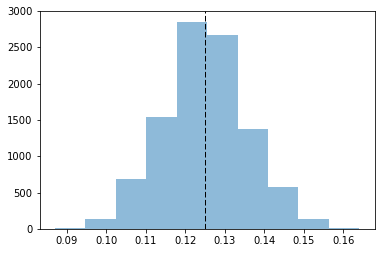

when y > x (half):  0.1249915
The answer is:  0.249983


In [26]:
print("The answer is: ", repeat_sim())

# Introduction to SymPy

In [27]:
import sympy as S

In [28]:
x = S.symbols("x")
x

x

In [29]:
p = sum(x**i for i in range(3)) # 2nd order polynomial
p

x**2 + x + 1

In [30]:
# we can find the roots of this polynomial using Sympy functions
S.solve(p) # solves p == 0

[-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [31]:
# same output but as a dictionary.
S.roots(p) 

{-1/2 - sqrt(3)*I/2: 1, -1/2 + sqrt(3)*I/2: 1}

In [32]:
from sympy.abc import a,b,c # quick way to get common symbols

In [33]:
p = a* x**2 + b*x + c
S.solve(p,x) # specific solving for x-variable

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

In [34]:
# Euler’s formula: exp(i * x) = cos(x) + i * sin(x)
a = S.symbols("a",real=True) #forced additional condition; a is a real number
S.exp(S.I * a) #using Sympy exponential

exp(I*a)

In [35]:
S.expand_complex(S.exp(S.I * a))

I*sin(a) + cos(a)

In [36]:
# evaluate!
y = S.tan(x) * x + x**2
yf= S.lambdify(x, y, "numpy") # Numpy function with lambdify

In [37]:
y.subs(x,0.1) # evaluated using Sympy

0.0200334672085451

In [38]:
yf(0.1) # evaluated using Numpy

0.020033467208545055

In [39]:
yf(np.arange(3)) # input is Numpy array

array([ 0.        ,  2.55740772, -0.37007973])

In [40]:
#for SymPy, need extra work..
np.array([y.subs(x, i).evalf() for i in range(3) ], dtype=np.float32)

array([ 0.        ,  2.55740762, -0.37007973], dtype=float32)

# Conditional Expectation as Projection

In [41]:
from sympy.abc import y,x
from sympy import integrate, simplify

Let’s consider the following example with probability density f = x + y
where (x, y) ∈ [0, 1]^2 and compute the conditional expectation straight from the definition:

In [42]:
fxy = x + y # joint density
fy = integrate(fxy, (x,0,1)) # marginal density
fx = integrate(fxy, (y,0,1)) # marginal density

* E(X|Y)   
= integrate(x `*` (fxy/fy), (x,0,1))  
= integrate(x `*` (x+y)/(y + 0.5), (x,0,1))  
= (3`*`y + 2)/(6`*`y + 3)

In [43]:
EXY = (3*y + 2)/(6*y + 3) # conditional expectation

* E(X − E(X|Y))^2 = E(X)^2 − E(E(X|Y))^2

In [44]:
LHS = integrate((x-EXY)**2*fxy, (x,0,1), (y,0,1))

In [45]:
RHS = integrate((x)**2*fx, (x,0,1)) - integrate((EXY)**2*fy, (y,0,1))

In [46]:
assert(simplify(LHS - RHS) == 0)

# Conditional Expectation and Mean Squared Error

We have two fair six-sided die (X and Y) and we want to measure the sum of the two variables as Z = X + Y .

Let’s suppose that given Z , we want the best estimate of X in the mean-squared-sense. 

Thus, we want to minimize the following:  
* J(α) = sum((x − αz)^2 * P(x, z))  => E((x - αz)^2)

substituting z with x + y,
* J(α) = sum((x − α(x + y))^2 * P(x, y))

In [47]:
from sympy.stats import density, E, Die

In [48]:
x = Die("D1", 6) # 1st 6-sided die
x

D1

In [49]:
y = Die("D2",6) # 2nd 6-sided die
y

D2

In [50]:
z = x + y # sum of 1st and 2nd die

In [51]:
J = E((x-a*(x+y))**2) # expectation

In [52]:
S.simplify(J) # 329*a**2/6 - 329*a/6 + 91/6

329*a**2/6 - 329*a/6 + 91/6

In [53]:
solution = S.solve(S.diff(J, a), a)

In [54]:
solution #=> E(x|z) = z/2

[1/2]

Using the conditional expectation operator E(·|z)  

E(z|z) = E(x+y|z) = E(x|z) + E(y|z) = z  
Because E(x|z) = E(y|z), 2 `*` E(x|z) = z  
Thus, E(x|z) = z/2

In [55]:
from sympy import stats

```stats.sample(x, S.Eq(z,7))``` function call samples the x variable subject to a condition on the z variable.

In other words, it generates random samples of x die, given that the sum of the outcomes of that die and the y die add up to z==7.

In [56]:
def mse(x, z, estimate, condition, n=1000):
    mse = np.mean([(estimate - stats.sample(x, S.Eq(z, condition)))**2 for _ in range(n)])
    print("MSE for estimate {}: {}".format(estimate, mse))
    return mse

In [57]:
# MSE using 6 as an estimate
z = 7
estimate = 6
mse(x=x, z=z, estimate=estimate, condition=z, n=1000)

MSE for estimate 6: 9067/1000


9067/1000

In [58]:
# MSE using 7/2 as an estimate: 7/2 is the MSE estimate
z = 7
estimate = 7/2
mse(x=x, z=z, estimate=estimate, condition=z, n=1000) #smallest MSE

MSE for estimate 3.5: 2.92000000000000


2.92000000000000

In [59]:
lst = np.arange(1,6.5,0.5)
lst

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ])

In [60]:
plt.plot(lst, [mse(x=x, z=z, estimate=candidate, condition=z, n=1000) for candidate in lst])
plt.axvline(3.5, color='k', linestyle='dashed', linewidth=1)

MSE for estimate 1.0: 9.27500000000000
MSE for estimate 1.5: 7.35600000000000
MSE for estimate 2.0: 5.00600000000000
MSE for estimate 2.5: 3.86000000000000
MSE for estimate 3.0: 3.27300000000000
MSE for estimate 3.5: 2.87200000000000
MSE for estimate 4.0: 3.07700000000000
MSE for estimate 4.5: 4.02400000000000
MSE for estimate 5.0: 5.17600000000000
MSE for estimate 5.5: 6.54200000000000
MSE for estimate 6.0: 8.96100000000000


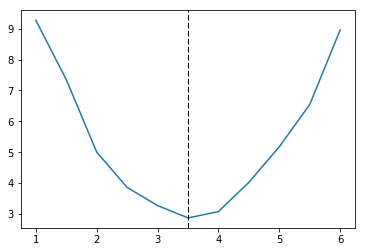

In [61]:
plt.show()

In [62]:
np.mean([stats.sample(x, S.Eq(7)) for _ in range(1000)]) # ~ 7/2

1743/500